In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/Users/florist/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('Plastic waste from land to ocean- by country.xlsx - Jambeck et al. (2014).csv')

df.head()

,Country,Economic status,Coastal population,Waste generation rate [kg/person/day],% Plastic in waste stream,% Inadequately managed waste,% Littered waste,Waste generation [kg/day],Plastic waste generation [kg/day],Inadequately managed plastic waste [kg/day],Plastic waste littered\n [kg/day],Mismanaged plastic waste [kg/person/day],Mismanaged plastic waste in 2010\n [tonnes],Mismanaged plastic waste in 2025\n [tonnes]
0,Albania,LMI,"2,530,533",0.77,9.0,45.0,2.0,"1,948,510","174,392","77,897","3,488",0.032,"29,705","63,051"
1,Algeria8,UMI,"16,556,580",1.20,12.0,58.0,2.0,"19,867,896","2,374,214","1,378,693","47,484",0.086,"520,555","1,017,444"
2,Angola,LMI,"3,790,041",0.48,13.0,71.0,2.0,"1,819,220","235,589","166,597","4,712",0.045,"62,528","136,770"
3,Anguilla,HIC,"14,561",2.10,12.0,2.0,2.0,"30,578","3,654",68,73,0.010,52,73
4,Antigua & Barbuda,HIC,"66,843",5.50,12.0,6.0,2.0,"367,637","43,933","2,555",879,0.051,"1,253","1,385"


In [3]:
print(df.shape)
print(df.dtypes)
print(df.describe())

(193, 14)
Country                                         object
Economic status                                 object
Coastal population                              object
Waste generation rate [kg/person/day]          float64
% Plastic in waste stream                      float64
% Inadequately managed waste                   float64
% Littered waste                               float64
Waste generation [kg/day]                       object
Plastic waste generation [kg/day]               object
Inadequately managed plastic waste [kg/day]     object
Plastic waste littered\n [kg/day]               object
Mismanaged plastic waste [kg/person/day]        object
Mismanaged plastic waste in 2010\n [tonnes]     object
Mismanaged plastic waste in 2025\n [tonnes]     object
dtype: object
       Waste generation rate [kg/person/day]  % Plastic in waste stream  \
count                             192.000000                 192.000000   
mean                                1.642760            

In [4]:
df.loc[192] #no country name, drop
df = df.drop(192)

In [5]:
df.Country.unique() #some countries contain '8' in their name
df['Country'] = df['Country'].str.replace('8', '')

In [6]:
df['Waste generation rate [kg/person/day]'].dtype

dtype('float64')

In [7]:
#replace ',' to convert some object types to numeric
for cols in df.columns:
    if df[cols].dtypes == 'object':
        df[cols] = df[cols].str.replace(',', '')
    else:
        df[cols]

In [8]:
df.head()

,Country,Economic status,Coastal population,Waste generation rate [kg/person/day],% Plastic in waste stream,% Inadequately managed waste,% Littered waste,Waste generation [kg/day],Plastic waste generation [kg/day],Inadequately managed plastic waste [kg/day],Plastic waste littered\n [kg/day],Mismanaged plastic waste [kg/person/day],Mismanaged plastic waste in 2010\n [tonnes],Mismanaged plastic waste in 2025\n [tonnes]
0,Albania,LMI,2530533,0.77,9.0,45.0,2.0,1948510,174392,77897,3488,0.032,29705,63051
1,Algeria,UMI,16556580,1.20,12.0,58.0,2.0,19867896,2374214,1378693,47484,0.086,520555,1017444
2,Angola,LMI,3790041,0.48,13.0,71.0,2.0,1819220,235589,166597,4712,0.045,62528,136770
3,Anguilla,HIC,14561,2.10,12.0,2.0,2.0,30578,3654,68,73,0.010,52,73
4,Antigua & Barbuda,HIC,66843,5.50,12.0,6.0,2.0,367637,43933,2555,879,0.051,1253,1385


In [9]:
list_to_change = ['Coastal population', 'Waste generation [kg/day]', 
        'Plastic waste generation [kg/day]',
       'Inadequately managed plastic waste [kg/day]',
       'Plastic waste littered\n [kg/day]',
       'Mismanaged plastic waste [kg/person/day]',
       'Mismanaged plastic waste in 2010\n [tonnes]',
       'Mismanaged plastic waste in 2025\n [tonnes]']

for cols in list_to_change:
    df[cols] = pd.to_numeric(df[cols])

In [10]:
df.dtypes

Country                                         object
Economic status                                 object
Coastal population                               int64
Waste generation rate [kg/person/day]          float64
% Plastic in waste stream                      float64
% Inadequately managed waste                   float64
% Littered waste                               float64
Waste generation [kg/day]                        int64
Plastic waste generation [kg/day]                int64
Inadequately managed plastic waste [kg/day]      int64
Plastic waste littered\n [kg/day]                int64
Mismanaged plastic waste [kg/person/day]       float64
Mismanaged plastic waste in 2010\n [tonnes]      int64
Mismanaged plastic waste in 2025\n [tonnes]      int64
dtype: object

In [11]:
df.describe()

,Coastal population,Waste generation rate [kg/person/day],% Plastic in waste stream,% Inadequately managed waste,% Littered waste,Waste generation [kg/day],Plastic waste generation [kg/day],Inadequately managed plastic waste [kg/day],Plastic waste littered\n [kg/day],Mismanaged plastic waste [kg/person/day],Mismanaged plastic waste in 2010\n [tonnes],Mismanaged plastic waste in 2025\n [tonnes]
count,1.920000e+02,192.000000,192.000000,192.000000,192.0,1.920000e+02,1.920000e+02,1.920000e+02,192.000000,192.000000,1.920000e+02,1.920000e+02
mean,1.053535e+07,1.642760,11.515625,33.973958,2.0,1.281152e+07,1.420189e+06,4.262948e+05,28403.791667,0.044370,1.659650e+05,3.601213e+05
std,3.069092e+07,1.365327,3.320532,34.213288,0.0,3.575310e+07,4.143231e+06,1.925674e+06,82864.637909,0.049801,7.210290e+05,1.510122e+06
min,5.960000e+02,0.140000,2.000000,0.000000,2.0,1.089000e+03,1.410000e+02,0.000000e+00,3.000000,0.001000,1.000000e+00,2.000000e+00
25%,1.679265e+05,0.790000,11.000000,0.000000,2.0,3.198012e+05,3.561625e+04,3.025000e+01,712.250000,0.006000,1.636000e+03,2.295000e+03
50%,1.374844e+06,1.240000,12.000000,22.000000,2.0,1.327021e+06,1.427755e+05,1.496850e+04,2855.500000,0.030500,1.538550e+04,2.459250e+04
75%,7.115553e+06,2.100000,13.000000,73.250000,2.0,9.354860e+06,1.049048e+06,1.366930e+05,20981.250000,0.066000,5.915600e+04,1.456510e+05
max,2.628924e+08,14.400000,25.000000,88.000000,2.0,2.913466e+08,3.772938e+07,2.353030e+07,754588.000000,0.299000,8.819717e+06,1.781478e+07


## Questions to Answer Through Analysis:

1. How much waste is generated per year worldwide? Per Country? Highest and Lowest Countries?
2. Do higher economic status countries produce more waste than low economic countries?
3. How long will it take for waste to overpower common things in numbers?

Let's look at our first question, How much waste is generated per year worldwide? Per country? Highest and lowest waste generation countries?

In [12]:
#look into some statistics, max, min of waste by country
df[df['Waste generation rate [kg/person/day]'] == df['Waste generation rate [kg/person/day]'].max()] 
#trinidad and tobago
df[df['Waste generation rate [kg/person/day]'] == df['Waste generation rate [kg/person/day]'].min()]
#mozambique
df[df['Waste generation [kg/day]'] == df['Waste generation [kg/day]'].max()]
#usa
df[df['Waste generation [kg/day]'] == df['Waste generation [kg/day]'].min()]
#tokelau
df[df['Plastic waste generation [kg/day]'] == df['Plastic waste generation [kg/day]'].max()]
#usa
df[df['Plastic waste generation [kg/day]'] == df['Plastic waste generation [kg/day]'].min()]
#tokelau

,Country,Economic status,Coastal population,Waste generation rate [kg/person/day],% Plastic in waste stream,% Inadequately managed waste,% Littered waste,Waste generation [kg/day],Plastic waste generation [kg/day],Inadequately managed plastic waste [kg/day],Plastic waste littered\n [kg/day],Mismanaged plastic waste [kg/person/day],Mismanaged plastic waste in 2010\n [tonnes],Mismanaged plastic waste in 2025\n [tonnes]
175,Tokelau,LMI,1379,0.79,13.0,82.0,2.0,1089,141,116,3,0.086,43,100


In [13]:
print(df['Waste generation [kg/day]'].max() * 365)
print(df['Waste generation [kg/day]'].min() * 365)

print(df['Waste generation rate [kg/person/day]'].max())
print(df['Waste generation rate [kg/person/day]'].min())

106341504620
397485
14.4
0.14


The __United States__ generated the most waste (kg/day) of 291,346,588 kg/day. __Tokelau__ generates the least at 1089 kg/day. Annually 106,341,504,620 kg and 397,485 kg respectively. 

__Trinidad and Tobago__ generated the most waste per person (kg/person/day) at 14.4 kg/person/day, and __Mozambique__ generated the least per person per day at 0.14 kg/person/day.

In [14]:
print('Waste generation per day worldwide is ' + str(df['Waste generation [kg/day]'].sum()) + ' kg')
print('For 2010 that was ' + str(df['Waste generation [kg/day]'].sum() * 365) + ' kg')

Waste generation per day worldwide is 2459811244 kg
For 2010 that was 897831104060 kg


Worldwide waste generation is __2,459,811,244 kg/day__ totalling __897,831,104,060 kg__ in 2010.

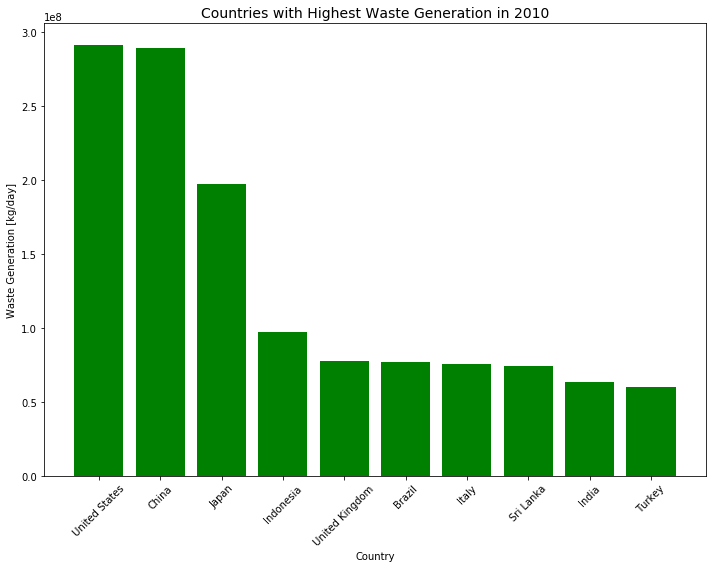

In [15]:
top_waste_gen = df.sort_values(by=['Waste generation [kg/day]'], ascending=False).head(10)

plt.figure(figsize=(10,8))
plt.bar(top_waste_gen['Country'], top_waste_gen['Waste generation [kg/day]'], color='green')
plt.xlabel('Country', fontsize=10)
plt.ylabel('Waste Generation [kg/day]', fontsize=10)
plt.xticks(rotation=45)
plt.title('Countries with Highest Waste Generation in 2010', fontsize=14)
plt.tight_layout();

Now for Plastic Waste Generation

In [16]:
print('Plastic waste generation per day worldwide is ' + str(df['Plastic waste generation [kg/day]'].sum()) + ' kg')
print('For 2010 that was ' + str(df['Plastic waste generation [kg/day]'].sum() * 365) + ' kg')

Plastic waste generation per day worldwide is 272676244 kg
For 2010 that was 99526829060 kg


Worldwide plastic waste generation per day was __272,676,244 kg__ totalling __99,526,829,060 kg__ in 2010.

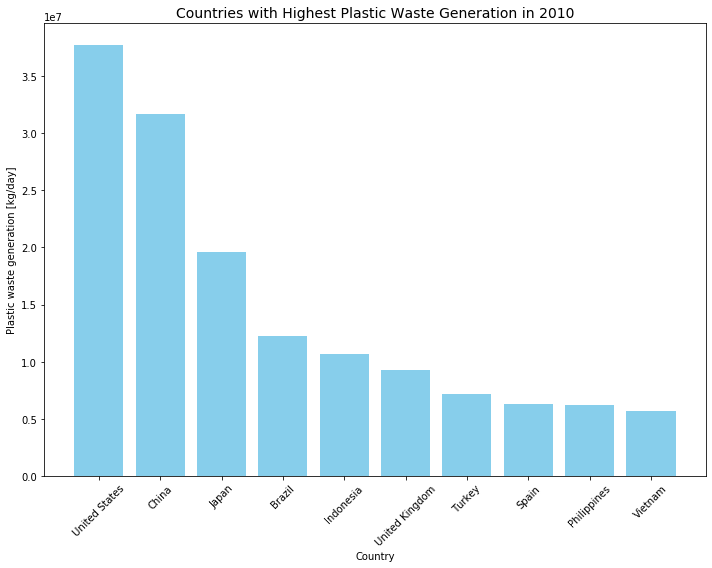

In [17]:
top_plastic_gen = df.sort_values(by=['Plastic waste generation [kg/day]'], ascending=False).head(10)

plt.figure(figsize=(10,8))
plt.bar(top_plastic_gen['Country'], top_plastic_gen['Plastic waste generation [kg/day]'], color='skyblue')
plt.xlabel('Country', fontsize=10)
plt.ylabel('Plastic waste generation [kg/day]', fontsize=10)
plt.xticks(rotation=45)
plt.title('Countries with Highest Plastic Waste Generation in 2010', fontsize=14)
plt.tight_layout();

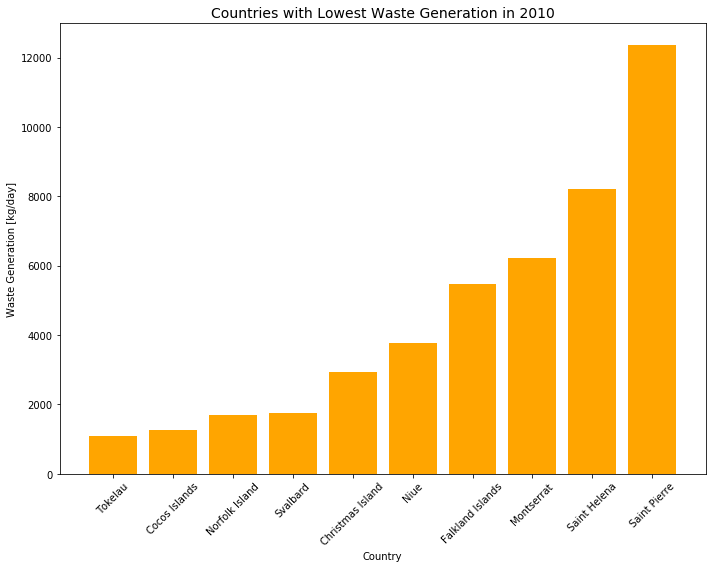

In [18]:
bottom_waste_gen = df.sort_values(by=['Waste generation [kg/day]']).head(10)

plt.figure(figsize=(10,8))
plt.bar(bottom_waste_gen['Country'], bottom_waste_gen['Waste generation [kg/day]'], color='orange')
plt.xlabel('Country', fontsize=10)
plt.ylabel('Waste Generation [kg/day]', fontsize=10)
plt.xticks(rotation=45)
plt.title('Countries with Lowest Waste Generation in 2010', fontsize=14)
plt.tight_layout();

In [19]:
bottom_waste_gen

,Country,Economic status,Coastal population,Waste generation rate [kg/person/day],% Plastic in waste stream,% Inadequately managed waste,% Littered waste,Waste generation [kg/day],Plastic waste generation [kg/day],Inadequately managed plastic waste [kg/day],Plastic waste littered\n [kg/day],Mismanaged plastic waste [kg/person/day],Mismanaged plastic waste in 2010\n [tonnes],Mismanaged plastic waste in 2025\n [tonnes]
175,Tokelau,LMI,1379,0.79,13.0,82.0,2.0,1089,141,116,3,0.086,43,100
31,Cocos Islands,HIC,596,2.10,12.0,0.0,2.0,1252,150,0,3,0.005,1,2
128,Norfolk Island,LMI,2156,0.79,13.0,82.0,2.0,1703,221,182,4,0.086,68,156
167,Svalbard,LMI,2226,0.79,13.0,0.0,2.0,1759,228,0,5,0.002,2,4
30,Christmas Island,HIC,1402,2.10,12.0,0.0,2.0,2944,352,0,7,0.005,3,4
127,Niue,HIC,1799,2.10,12.0,0.0,2.0,3778,451,1,9,0.006,4,5
55,Falkland Islands,HIC,2602,2.10,12.0,0.0,2.0,5464,653,0,13,0.005,5,7
116,Montserrat,UMI,5173,1.20,12.0,12.0,2.0,6208,742,89,15,0.020,38,71
146,Saint Helena,UMI,6839,1.20,12.0,25.0,2.0,8207,981,244,20,0.039,96,182
150,Saint Pierre,HIC,5888,2.10,12.0,0.0,2.0,12365,1478,0,30,0.005,11,15


In [20]:
print(sum(bottom_waste_gen['Coastal population']))
print(sum(top_waste_gen['Coastal population']))

sum(top_waste_gen['Coastal population'])/sum(bottom_waste_gen['Coastal population'])

30060
1066152449


35467.48000665336

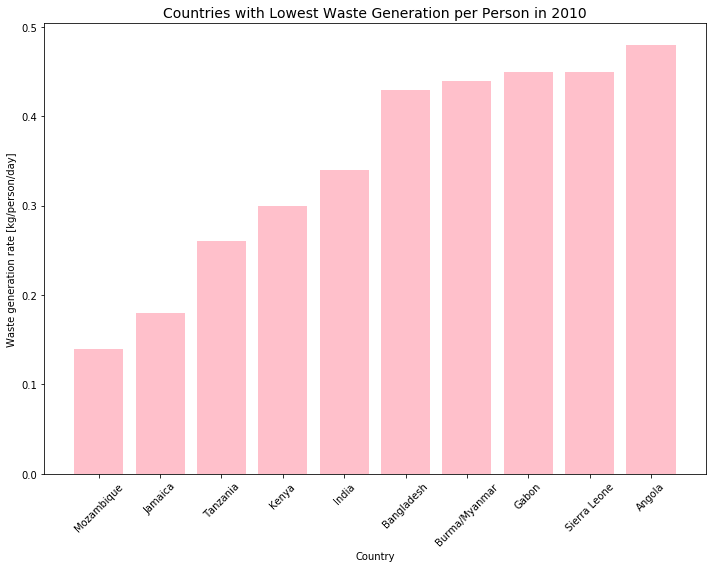

In [21]:
bottom_waste_gen_per_day = df.sort_values(by=['Waste generation rate [kg/person/day]']).head(10)

plt.figure(figsize=(10,8))
plt.bar(bottom_waste_gen_per_day['Country'], bottom_waste_gen_per_day['Waste generation rate [kg/person/day]'], color='pink')
plt.xlabel('Country', fontsize=10)
plt.ylabel('Waste generation rate [kg/person/day]', fontsize=10)
plt.xticks(rotation=45)
plt.title('Countries with Lowest Waste Generation per Person in 2010', fontsize=14)
plt.tight_layout();

In [22]:
bottom_waste_gen_per_day

,Country,Economic status,Coastal population,Waste generation rate [kg/person/day],% Plastic in waste stream,% Inadequately managed waste,% Littered waste,Waste generation [kg/day],Plastic waste generation [kg/day],Inadequately managed plastic waste [kg/day],Plastic waste littered\n [kg/day],Mismanaged plastic waste [kg/person/day],Mismanaged plastic waste in 2010\n [tonnes],Mismanaged plastic waste in 2025\n [tonnes]
118,Mozambique,LI,9566559,0.14,11.0,84.0,2.0,1339318,146655,123081,2933,0.013,45995,287067
89,Jamaica,UMI,2820558,0.18,19.0,27.0,2.0,507700,96209,25525,1924,0.010,10019,59575
171,Tanzania,LI,6688695,0.26,9.0,84.0,2.0,1739061,155646,129999,3113,0.020,48586,214196
93,Kenya,LI,2729945,0.30,9.0,83.0,2.0,818984,73299,60610,1466,0.023,22658,87109
81,India,LMI,187493433,0.34,3.0,85.0,2.0,63747767,1880559,1605729,37611,0.009,599819,2881294
10,Bangladesh,LI,70874124,0.43,8.0,87.0,2.0,30475873,2422832,2108603,48457,0.030,787327,2210230
21,Burma/Myanmar,LI,18988522,0.44,17.0,87.0,2.0,8354950,1416164,1227208,28323,0.066,458269,1149267
62,Gabon,UMI,862328,0.45,12.0,34.0,2.0,388048,46372,15750,927,0.019,6087,15446
157,Sierra Leone,LI,2887017,0.45,9.0,84.0,2.0,1299158,116275,97423,2325,0.035,36408,121312
2,Angola,LMI,3790041,0.48,13.0,71.0,2.0,1819220,235589,166597,4712,0.045,62528,136770


Above we have the countries that generated the least amount of waste in 2010. Granted these 10 countries have a combined coastal population of only 30,060 where as the 10 countries that generated the most waste has a coastal population of 1,066,152,449. 

When we take a look at the waste generation per person, we get a whole set of different countries with Mozambique generating the least waste per person. This is interesting, as the coastal population for these countries is combined 306,701,222 in 2010.

Does the economic status of a country show any trend in the amount of waste the country produces? Do higher income countries generate more? 

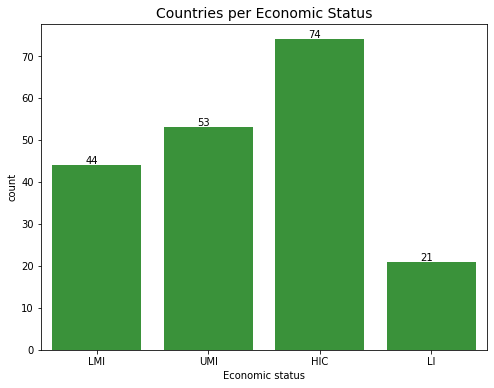

In [23]:
fig,ax = plt.subplots(figsize=(8,6))
sns.countplot(data=df, x='Economic status', color=sns.color_palette()[2])
plt.title('Countries per Economic Status', fontsize=14)

for i in ax.patches:
    ax.text(i.get_x()+0.3, i.get_height()+0.4,                           
            str(round((i.get_height()), 2)), fontsize=10, color='black');

Almost 40% of the countries were considered "High Income Countries" in 2010. This number has grown from 74 to 81 in 2019 according to [The World Bank]('https://datatopics.worldbank.org/world-development-indicators/stories/the-classification-of-countries-by-income.html#:~:text=As%20of%201%20July%202019,between%20%243%2C996%20and%20%2412%2C375%3B%20high%2D'). Let us see where these countries stand.

In [25]:
print('The average waste generation worldwide was ' + str(df['Waste generation [kg/day]'].mean()) + ' kg/day.')

print('Low Income Countries generate an average of ' + 
      str(df[df['Economic status'] == 'LI']['Waste generation [kg/day]'].mean()) + ' kg/day of waste.')

print('Low Income countries generate about 3.2 times LESS than the world wide average.')


print('The average waste generation rate worldwide was ' + 
      str(df['Waste generation rate [kg/person/day]'].mean()) + ' kg/person/day.')

print('Low Income Countries generate an average of ' + 
      str(df[df['Economic status'] == 'LI']['Waste generation rate [kg/person/day]'].mean()) + 
      ' kg/person/day of waste.')

print('Low Income countries 2.7 times less waste per person per day than the world wide average.')

The average waste generation worldwide was 12811516.895833334 kg/day.
Low Income Countries generate an average of 4005247.380952381 kg/day of waste.
Low Income countries generate about 3.2 times LESS than the world wide average.
The average waste generation rate worldwide was 1.6427604166666663 kg/person/day.
Low Income Countries generate an average of 0.6066666666666666 kg/person/day of waste.
Low Income countries 2.7 times less waste per person per day than the world wide average.


Not only do Low Income countries (`~$1025 or less`) produce an average of __3.2 times less__ waste than the rest of the world, but also produce __2.7 times less__ waste per person per day than the rest of the world as well. What about Lower Middle Income countries?

In [26]:
world_waste_mean = df['Waste generation [kg/day]'].mean()

print('The average waste generation worldwide was ' + str(world_waste_mean) + ' kg/day.')

print('Lower Middle Income Countries generate an average of ' + 
      str(df[df['Economic status'] == 'LMI']['Waste generation [kg/day]'].mean()) + ' kg/day of waste.')

world_waste_rate_mean = df['Waste generation rate [kg/person/day]'].mean()

print('The average waste generation rate worldwide was ' + 
      str(df['Waste generation rate [kg/person/day]'].mean()) + ' kg/person/day.')

print('Low Middle Income Countries generate an average of ' + 
      str(df[df['Economic status'] == 'LMI']['Waste generation rate [kg/person/day]'].mean()) + 
      ' kg/person/day of waste.')

The average waste generation worldwide was 12811516.895833334 kg/day.
Lower Middle Income Countries generate an average of 11147608.159090908 kg/day of waste.
The average waste generation rate worldwide was 1.6427604166666663 kg/person/day.
Low Middle Income Countries generate an average of 1.2361363636363634 kg/person/day of waste.


In [27]:
print(world_waste_mean/11147608.159090908)
print(world_waste_rate_mean/1.2361363636363634)

1.1492615019290486
1.3289475700189985


Lower Middle Income countries (`~$1,026 and $3,995`) produce about __1.15 times less__ waste than the worldwide average, as well as __1.33 times less__ than the worldwide per person per day average.

In [28]:
print('Upper Middle Income Countries generate an average of ' + 
      str(df[df['Economic status'] == 'UMI']['Waste generation [kg/day]'].mean()) + ' kg/day of waste.')


print('Upper Middle Income Countries generate an average of ' + 
      str(df[df['Economic status'] == 'UMI']['Waste generation rate [kg/person/day]'].mean()) + 
      ' kg/person/day of waste.')

Upper Middle Income Countries generate an average of 13254704.679245284 kg/day of waste.
Upper Middle Income Countries generate an average of 1.4541509433962272 kg/person/day of waste.


In [29]:
print(13254704.679245284/world_waste_mean)
print(world_waste_rate_mean/1.4541509433962272)

1.0345929203399862
1.1297041920764663


Upper Middle Income countries (`~$3,996 and $12,375`) produce __1.03 times MORE__ waste per day than the world wide average, but about __1.13 times LESS__ waste per person per day than the world wide average. What will we see for the high income countries? 

In [30]:
print('High Income Countries generate an average of ' + 
      str(df[df['Economic status'] == 'HIC']['Waste generation [kg/day]'].mean()) + ' kg/day of waste.')


print('High Income Countries generate an average of ' + 
      str(df[df['Economic status'] == 'HIC']['Waste generation rate [kg/person/day]'].mean()) + 
      ' kg/person/day of waste.')

High Income Countries generate an average of 15982526.243243244 kg/day of waste.
High Income Countries generate an average of 2.313648648648648 kg/person/day of waste.


In [31]:
print(15982526.243243244/world_waste_mean)
print(2.313648648648648/world_waste_rate_mean)

1.247512404127665
1.4083907946499492


High Income countries (`~$12,376 or more`) produce on average 15,982,526 kg/day of waste which is __1.25 times MORE__ than the world wide average. Per person per day, High Income countries generate 2.3 kg/person/day averaging about __1.4 times MORE__ than the world wide average.

In [32]:
econ_status = df.groupby(['Economic status']).mean()['Waste generation [kg/day]']

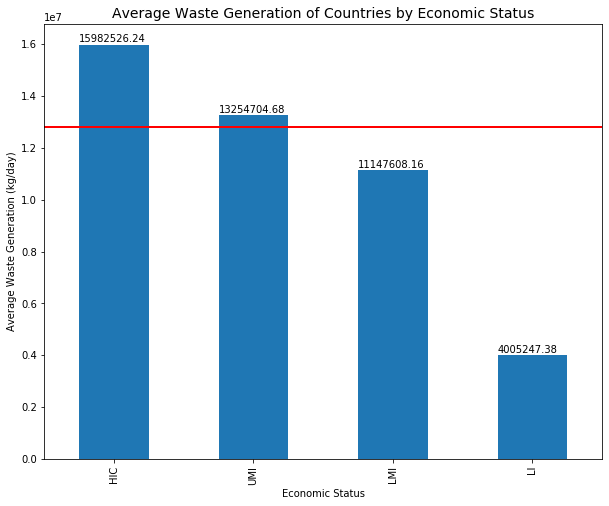

In [33]:
fig,ax = plt.subplots(figsize=(10,8))
econ_status.sort_values(ascending=False).plot(kind='bar')

plt.title('Average Waste Generation of Countries by Economic Status', fontsize=14)
plt.xlabel('Economic Status', fontsize=10)
plt.ylabel('Average Waste Generation (kg/day)', fontsize=10)

ax.axhline(df['Waste generation [kg/day]'].mean(), color='red', linewidth=2)

for i in ax.patches:
    ax.text(i.get_x(), i.get_height()+100000,                           
            str(round((i.get_height()), 2)), fontsize=10, color='black');

In 2010, High Income and Upper Middle Income status countries generated more waste versus their Lower Middle to Low Income country counterparts. On average generating above the world average. This result shouldn't come to a surprise.

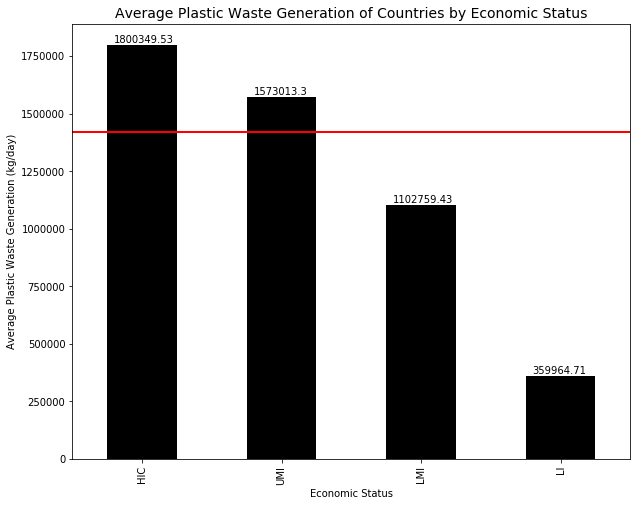

In [34]:
plastic_status = df.groupby(['Economic status']).mean()['Plastic waste generation [kg/day]']

fig,ax = plt.subplots(figsize=(10,8))
plastic_status.sort_values(ascending=False).plot(kind='bar', color='black')

plt.title('Average Plastic Waste Generation of Countries by Economic Status', fontsize=14)
plt.xlabel('Economic Status', fontsize=10)
plt.ylabel('Average Plastic Waste Generation (kg/day)', fontsize=10)

ax.axhline(df['Plastic waste generation [kg/day]'].mean(), color='red', linewidth=2)

for i in ax.patches:
    ax.text(i.get_x()+0.05, i.get_height()+10000,                           
            str(round((i.get_height()), 2)), fontsize=10, color='black');

We see the same result for Plastic Waste Generation per day, where High Income and Upper Middle Income countries are above the world wide average, and Lower Middle and Low Income countries fall below the average line.

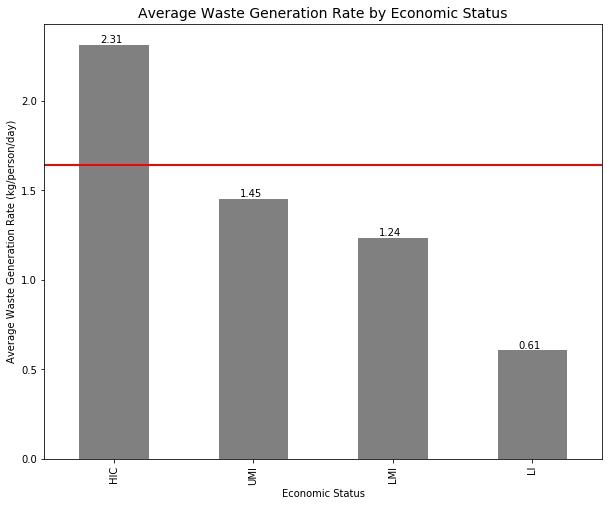

In [45]:
waste_per_day_status = df.groupby(['Economic status']).mean()['Waste generation rate [kg/person/day]']

fig,ax = plt.subplots(figsize=(10,8))
waste_per_day_status.sort_values(ascending=False).plot(kind='bar', color='grey')

plt.title('Average Waste Generation Rate by Economic Status', fontsize=14)
plt.xlabel('Economic Status', fontsize=10)
plt.ylabel('Average Waste Generation Rate (kg/person/day)', fontsize=10)

ax.axhline(df['Waste generation rate [kg/person/day]'].mean(), color='red', linewidth=2)

for i in ax.patches:
    ax.text(i.get_x()+0.15, i.get_height()+0.01,                           
            str(round((i.get_height()), 2)), fontsize=10, color='black');

Overall, countries with higher economic status do indeed produce more waste overall. Even individually, higher economic countries produce more waste per person than lower income status countries.

In [36]:
waste_sum = df['Waste generation [kg/day]'].sum() * 365
waste_sum

897831104060

Now, 2,459,811,244 kg of waste EVERY DAY for a total of 897,831,104,060 kg for all of 2010 is an immense amount. That is 897,831,104 TONNES! This led me to analyze and compare the number of "things in the world" to the amount of waste we generate.

- There are a reported 3 trillion trees in the world
- There are a reported 3.5 trillion fish in the sea

In [37]:
trees_worldwide = 3000000000000
fish_worldwide = 3500000000000

years_trees = trees_worldwide/waste_sum
years_fish = fish_worldwide/waste_sum

In [38]:
print(years_trees)
print(years_fish)

3.3413856864993585
3.898283300915918


If we were to not increase our waste generation for the next 4 years, our waste generation would already surpass the number of trees and fish worldwide.

In [47]:
df['Waste generation rate [kg/person/day]'].mean()

1.6427604166666663